## A simple feed forward network for MNIST image classification

In [ ]:
# Import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt 

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The black and white images from NIST were normalized to fit into a 28x28 pixel bounding box.

The MNIST database contains 60,000 training images and 10,000 testing images.

In [ ]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)


11493376/11490434 [==============================] - 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


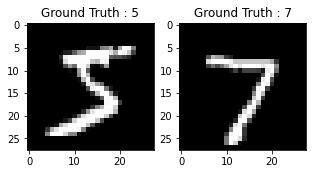

In [ ]:
# let's see some sample images in the dataset

# Define the plot size 
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

In [ ]:
# Change the image format from 2D array of size 28x28 to 1D arrya of size 784
print(train_images.shape)

(60000, 28, 28)


In [ ]:
# Get the size of required 1D array

dim_data = np.prod(train_images.shape[1:])
print(dim_data)

784


In [ ]:
# Now reshape the 2D array to 1D array

train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Change to float datatype

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Check how the one hot encoded labels look like
print(test_labels_one_hot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Define the model

model = Sequential() # type of model

# Define the model layers

model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

# Compile the model

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Let's see how the model looks and check the parameters

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
# Now we can start the training

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=2, verbose =1,  
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/2
235/235 [==============================] - 3s 6ms/step - loss: 28.5067 - accuracy: 0.7791 - val_loss: 0.6700 - val_accuracy: 0.9337
Epoch 2/2
235/235 [==============================] - 1s 4ms/step - loss: 0.4567 - accuracy: 0.9468 - val_loss: 0.4724 - val_accuracy: 0.9384


## Evaluate the model

In [ ]:
# let's run the trained model on test data and see how it performs

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.4724 - accuracy: 0.9384
Evaluation result on Test Data : Loss = 0.4723735749721527, accuracy = 0.9383999705314636


## Run the sample predictions

Probability of all the classes: [[1.8055451e-22 2.7032986e-22 1.0000000e+00 2.8717707e-13 3.1364427e-30
  9.2547016e-23 4.8723047e-18 4.1706158e-35 1.1956954e-19 6.2594780e-34]]
Model prediction: [2]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


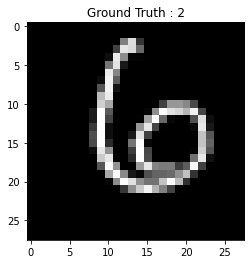

In [ ]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[1],:])))

print("Model prediction: {}".format(model.predict_classes(test_data[[1],:])))

# Display the predicted image
plt.imshow(test_images[100], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

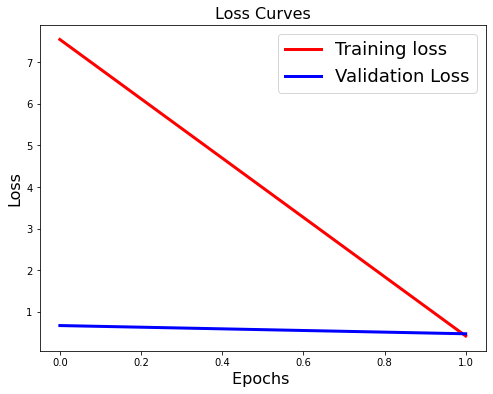

In [ ]:
# Let us observe the training over the epochs

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

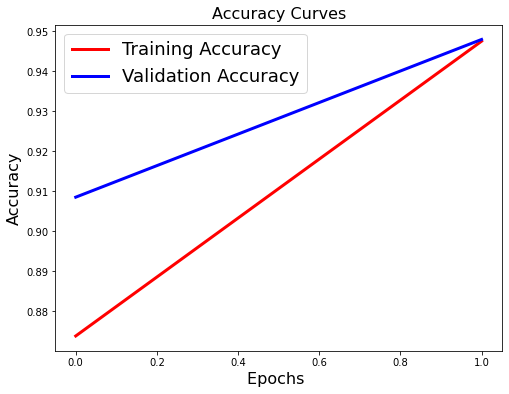

In [ ]:

#Plot the Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)
plt.show()